In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

In [2]:
%matplotlib widget

In [3]:
# Set the simulation parameters
T = 8000   # number of time steps
n0 = 20    # number of particles added at each time step
x0, y0 = 20, 20   # source location
w = np.array([300, 80, 160, 100, 140, 2])   # weights for random actions
prob = w / sum(w)
prob

array([0.38363171, 0.10230179, 0.20460358, 0.12787724, 0.17902813,
       0.00255754])

In [4]:
# Initialize the system
N = np.zeros(T, dtype=int)   # number of particles in the system at each time step
s = np.zeros((100, 100), dtype=int)   # sedimentation array
s_count = np.zeros(T, dtype=int)

snapshot_interval = 1000
snapshot_count = int(T / 1000)

s_array = np.zeros((snapshot_count + 1, 100, 100))

s_idx = 0

# Add particles at the source location
X = np.array([[x0, y0]] * n0)


# Loop over the time steps
for t in range(T):

    # Add new particles at the source location, skipping the first step
    if t != 0:
        X = np.concatenate((X, np.array([[x0, y0]] * n0)))
    

    # Decide and perform a random action for each particle
    actions = np.random.choice(range(6), size=X.shape[0], p=prob)
    idx = []
    for i, a in enumerate(actions):
        if a == 0:
            continue
        elif a == 1:
            if X[i, 0] > 0:
                X[i, 0] += -1
            # else:
                # idx.append(i)
            
        elif a == 2:
            if X[i, 0] < 99:
                X[i, 0] += 1
            # else:
                # idx.append(i)
            
        elif a == 3:
            if X[i, 1] > 0:
                X[i, 1] += -1
            # else:
                # idx.append(i)
            
        elif a == 4:
            if X[i, 1] < 99:
                X[i, 1] += 1
            # else:
                # idx.append(i)

            
        else:
            s[X[i, 0], X[i, 1]] += 1
            s_count[t] += 1
            idx.append(i)

            
    X = np.delete(X, idx, axis=0)

    if (t % snapshot_interval == 0 or t + 1 == T):
            s_array[s_idx] = s
            s_idx += 1
    
    
    
    # Record the number of particles and sedimentation at this time step
    N[t] = X.shape[0]
    

In [5]:
# Print the total number of sedimentation particles
print('Total sedimentation:', np.sum(s))

Total sedimentation: 152104


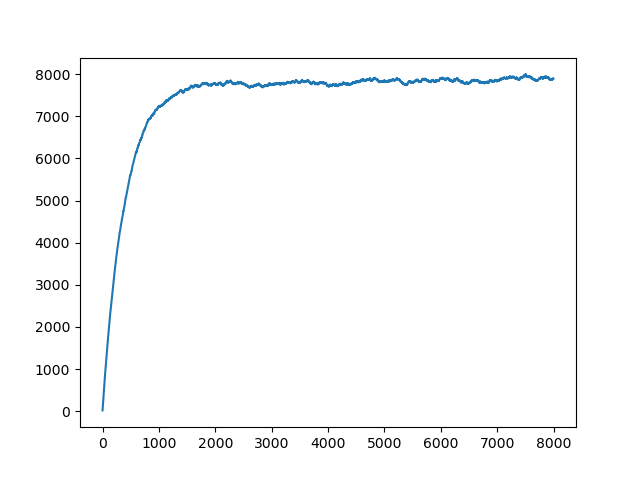

In [6]:
plt.plot(N)

In [7]:
s_array.shape

(9, 100, 100)

In [8]:
a = np.argmax(np.argmax(s, axis=0))
np.sum(s)

152104

In [10]:
np.max(s_array)

1097.0

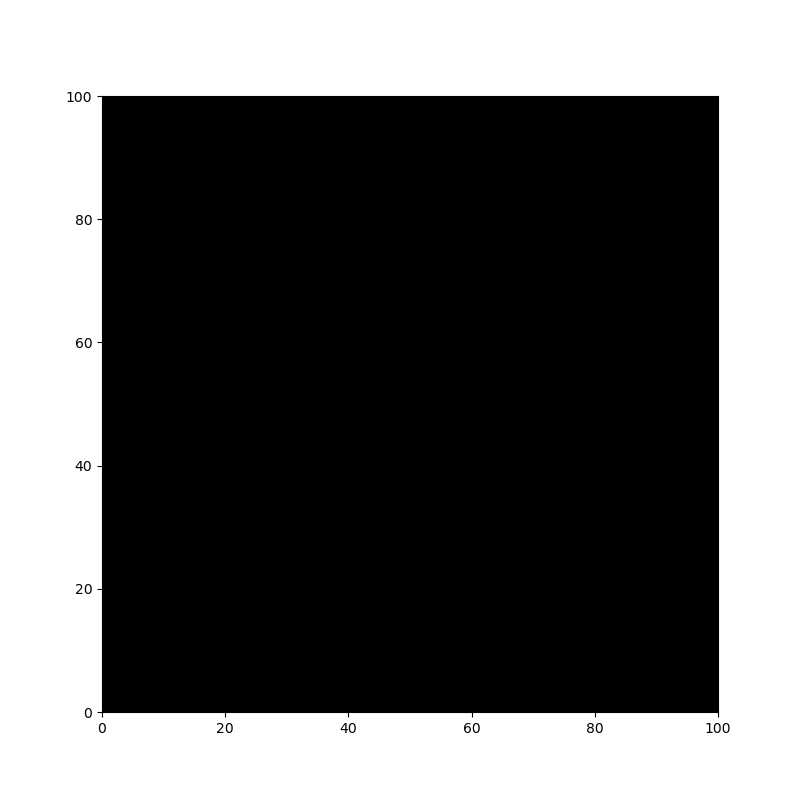

In [11]:
fig, ax = plt.subplots(1, 1, figsize=(8, 8))

im = plt.imshow(s_array[0], cmap="inferno", vmin=0, vmax=np.max(s_array), extent=[0, 100, 0, 100], origin="lower")

def animate(frame):
    im.set_data(s_array[frame])
    return im,

anim = FuncAnimation(fig, animate, 
                     frames=s_array.shape[0],
                     interval=800)

In [12]:
anim.pause()

In [13]:
a = np.c_[range(T), s_count]
np.max(s_count)

37

In [14]:
sum(s_count)

152104

In [15]:
plt.plot(s_count)

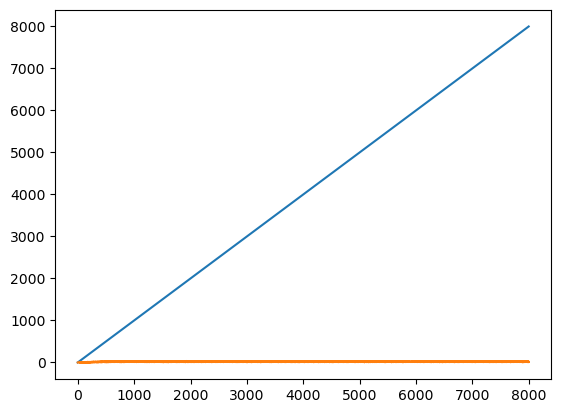

In [67]:
plt.plot(a)